In [2]:
#importing the libraries

import numpy as np #linear algebra
import pandas as pd #data preprocessing
import matplotlib.pyplot as plt #visualization similar to ggplot2 on R
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

In [3]:
import sys

In [5]:
'geopandas' in sys.modules

False

In [6]:
pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 960.9 kB/s eta 0:00:00
     ---------------------------------------- 22.9/22.9 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install geoplot

In [1]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

SystemError: initialization of _internal failed without raising an exception

In [48]:
usa = gpd.read_file("C:\\Users\\Abraham\\Documents\\abraham\\data mining - iup lab assistant\\cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [49]:
state_pop = pd.read_csv("C:\\Users\\Abraham\\Documents\\abraham\\data mining - iup lab assistant\\nst-est2018-alldata.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833
3,20,3,0,0,South Region,114555744,114563045,114867066,116039399,117271075,...,2.963135,2.779373,5.379667,5.836112,5.290067,6.206402,7.328494,7.225046,6.252425,6.148925
4,20,4,0,0,West Region,71945553,71946887,72103625,72787447,73489477,...,1.478565,1.350094,2.689358,3.226360,3.343874,4.148127,5.127995,5.372314,4.164981,3.965769


In [50]:
pop_states = usa.merge(state_pop, left_on="NAME", right_on="NAME")
pop_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",...,-3.991992,-4.063440,3.600733,3.315179,1.775836,1.160255,0.315784,-1.352135,-0.208652,-0.322019
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",...,-1.278002,-0.916222,1.843768,-0.120479,2.359797,1.925327,0.702299,0.036461,0.573348,0.934001
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",...,4.689728,7.127976,4.801565,4.910826,6.209397,6.493793,6.755571,5.516683,6.460703,9.019623
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",...,-0.698138,-1.040184,-1.999325,-1.820990,0.365060,-0.030544,-0.494039,-0.313424,0.968963,0.716636
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",...,-2.144836,-1.598828,1.516750,0.547598,-0.023724,-0.133225,-0.921843,-0.952470,0.302260,1.165270


<AxesSubplot:>

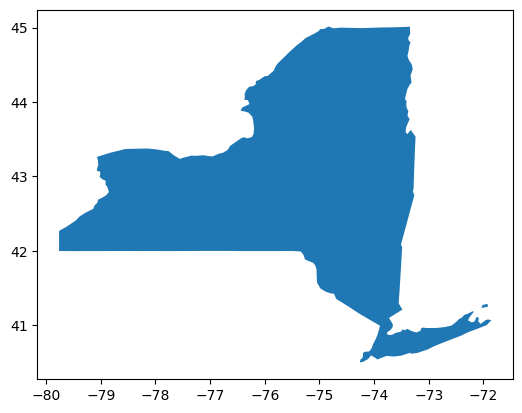

In [55]:
pop_states[pop_states.NAME=="New York"].plot()

In [56]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

In [57]:
display(contiguous_usa)

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."
5,Arizona,USA-3520,6392017,"POLYGON ((-109.04523 36.99991, -109.04367 31.3..."
6,California,USA-3521,37253956,"POLYGON ((-114.35490 34.46467, -114.16597 34.2..."
7,Colorado,USA-3522,5029196,"POLYGON ((-102.05017 40.00082, -102.04012 38.4..."
8,Nevada,USA-3523,2700551,"POLYGON ((-114.03053 36.99410, -114.02363 36.1..."
9,New Mexico,USA-3524,2059179,"POLYGON ((-103.00161 33.87995, -103.00161 31.9..."


<AxesSubplot:>

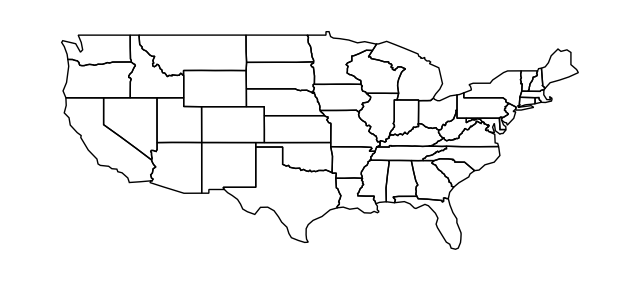

In [58]:
gplt.polyplot(contiguous_usa)

In [59]:
path = gplt.datasets.get_path("usa_cities")
usa_cities = gpd.read_file(path)
display(usa_cities)

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)
...,...,...,...,...,...
3661,38128,2565635.0,49.0,NY,POINT (-73.94956 40.65009)
3662,38129,2272771.0,39.0,NY,POINT (-73.79745 40.75016)
3663,38130,470728.0,164.0,NY,POINT (-74.14981 40.58328)
3664,38138,28712.0,187.0,MA,POINT (-71.33303 41.98405)


<AxesSubplot:>

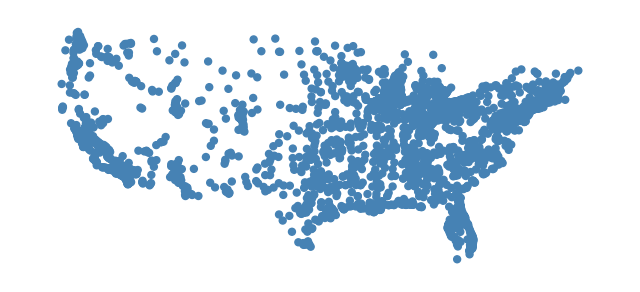

In [66]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]') #removing some data, HI = hawaii, AK = alaska, PR = puerto rico
gplt.pointplot(continental_usa_cities)

<AxesSubplot:>

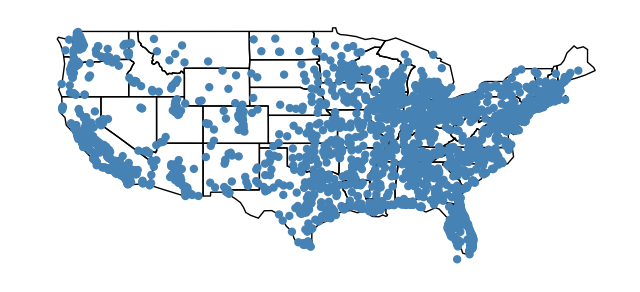

In [60]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

Albers equar-area conic projection

The Albers equal-area conic projection, or Albers projection (named after Heinrich C. Albers), is a conic, equal area map projection that uses two standard parallels. Although scale and shape are not preserved, distortion is minimal between the standard parallels (Source: Wikipedia)

<GeoAxesSubplot:>

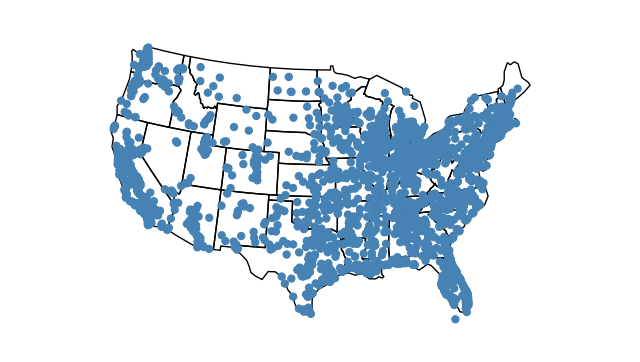

In [61]:
#readjusting using an Albers equal-area conic projection

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

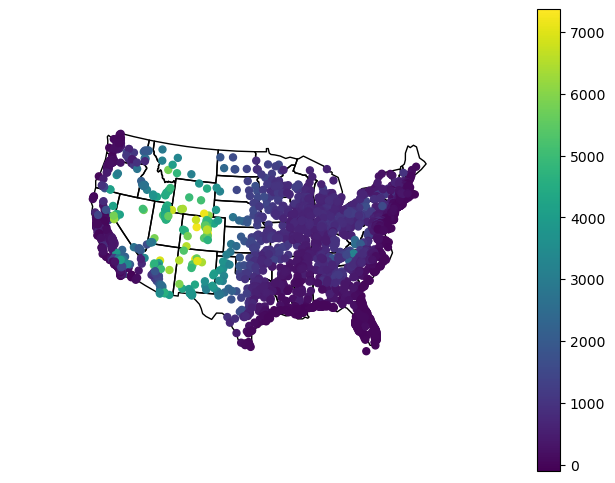

In [68]:
#extracting visuals for elevation/height data using pointplot

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(
  continental_usa_cities,
  ax=ax,
  hue="ELEV_IN_FT",
  legend=True
)

<GeoAxesSubplot:>

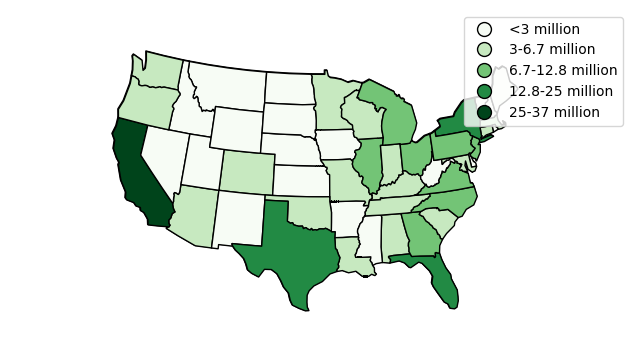

In [63]:
#for population data

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  contiguous_usa,
  hue="population",
  edgecolor="black",
  linewidth=1,
  cmap="Greens",
  legend=True,
  scheme="FisherJenks", #specifying the classification scheme for data
  legend_labels=[
    "<3 million", "3-6.7 million", "6.7-12.8 million",
    "12.8-25 million", "25-37 million"
  ],
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

C:\Users\Abraham\anaconda3\lib\site-packages\pandas\core\frame.py:4515: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  data[k] = com.apply_if_callable(v, data)


<GeoAxesSubplot:>

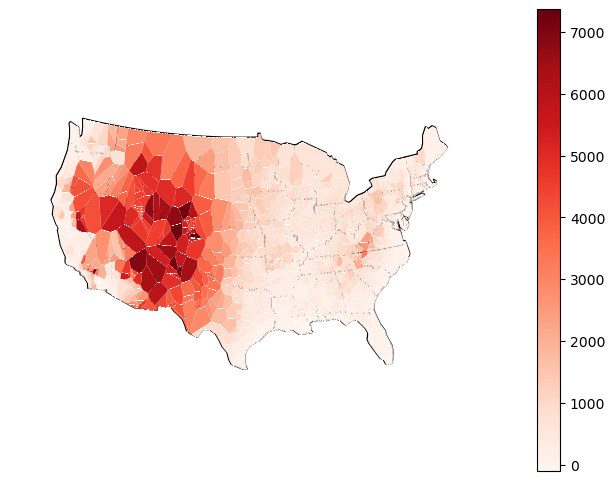

In [45]:
#for elevation/height data

proj = gplt.crs.AlbersEqualArea(
  central_longitude=-98, #specifies longitude
  central_latitude=39.5 #specifies latitude
)

ax = gplt.voronoi(
  continental_usa_cities,
  hue="ELEV_IN_FT",
  clip=contiguous_usa,
  projection=proj,
  cmap="Reds",
  legend=True,
  edgecolor="white",
  linewidth=0.01
)

gplt.polyplot(
  contiguous_usa,
  ax=ax,
  extent=contiguous_usa.total_bounds,
  edgecolor="black",
  linewidth=1,
  zorder=1
)